<a href="https://colab.research.google.com/github/valerialrc/ufv/blob/main/ELT574_89397_Atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Curso de Especialização em Inteligência Artificial e Computacional**
**ELT 574 - Aprendizado de Máquinas**


### Atividade 01



In [ ]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
from google.colab import drive
drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Mounted at /content/drive
Setup completo!


#### 1. Formulação do problema

*Estimar o valor médio das propriedades em Melbourne, dado um determinado conjunto de dados e características desta cidade.*

Fonte: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot/data

*Variáveis do banco de dados:*

- Rooms: *Número de quartos*

- Price: *Preço em dólares*

- Method: *S - imóvel vendido; SP - imóvel vendido anteriormente; PI - imóvel repassado; PN - vendido anteriormente não divulgado; SN - vendido não divulgado; NB - sem oferta; VB - oferta do fornecedor; W - retirado antes do leilão; SA - vendido após leilão; SS - vendido após leilão, preço não divulgado. N/A - preço ou lance mais alto não disponível.*

- Type: *br - quarto(s); h - casa, chalé, vila, semi, terraço; u - unidade, duplex; t - casa geminada; dev site - terreno para desenvolvimento; o res - outros residenciais.*

- SellerG: *Agente imobiliário*

- Date: *Data de venda*

- Distance: *Distância do CBD (Centro da Cidade)*

- Regionname: *Região Geral (Oeste, Noroeste, Norte, Nordeste, etc.)*

- Propertycount: *Número de propriedades que existem no subúrbio.*

- Bedroom2: *Número de quartos (coletado de uma fonte diferente)*

- Bathroom: *Número de banheiros*

- Car: *Número de vagas de estacionamento*

- Landsize: *Tamanho do terreno*

- BuildingArea: *Área construída*

- CouncilArea: *Conselho governante para a área*

#### 2. Seleção do banco de dados

In [ ]:
# Importar os dados do banco de dados

path = '/content/drive/MyDrive/UFV/ELT574/melb_data.csv'

df_melb_data = pd.read_csv(path)
print('Dataset carregado!')

df_melb_data.head()

Dataset carregado!


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
## Verificar informacoes gerais sobre as variaveis do dataframe
df_melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Suburb               13580 non-null  object 
 1   Address              13580 non-null  object 
 2   Rooms                13580 non-null  int64  
 3   Type                 13580 non-null  object 
 4   Price                13580 non-null  float64
 5   Method               13580 non-null  object 
 6   SellerG              13580 non-null  object 
 7   Date                 13580 non-null  object 
 8   Distance             13580 non-null  float64
 9   Postcode             13580 non-null  float64
 10  Bedroom2             13580 non-null  float64
 11  Bathroom             13580 non-null  float64
 12  Car                  13518 non-null  float64
 13  Landsize             13580 non-null  float64
 14  BuildingArea         13580 non-null  float64
 15  YearBuilt            8205 non-null  

In [ ]:
df_melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Rooms_per_YearBuilt'],
      dtype='object')

In [ ]:
# Criando novas variaveis para analisar o problema
df_melb_data["Rooms_per_YearBuilt"]= df_melb_data["Rooms"]/df_melb_data["YearBuilt"]

corr_matrix = df_melb_data.corr()
corr_matrix['Price'].sort_values(ascending=False)

<ipython-input-75-09b042f6e1cd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_melb_data.corr()


Price                  1.000000
Rooms_per_YearBuilt    0.544495
Rooms                  0.496634
Bedroom2               0.475951
Bathroom               0.467038
Car                    0.238979
Longtitude             0.203656
Postcode               0.107867
BuildingArea           0.069763
Landsize               0.037507
Propertycount         -0.042153
Distance              -0.162522
Lattitude             -0.212934
YearBuilt             -0.323617
Name: Price, dtype: float64

#### Conclusão
A variável criada (Rooms_per_YearBuilt) possui a maior correlação com a variável alvo (Price) dentre as variáveis já estudadas, o que significa que conforme o valor da variável aumenta (o número de quartos aumenta ou/e o ano de construção diminui), o preço do imóvel tende a aumentar.

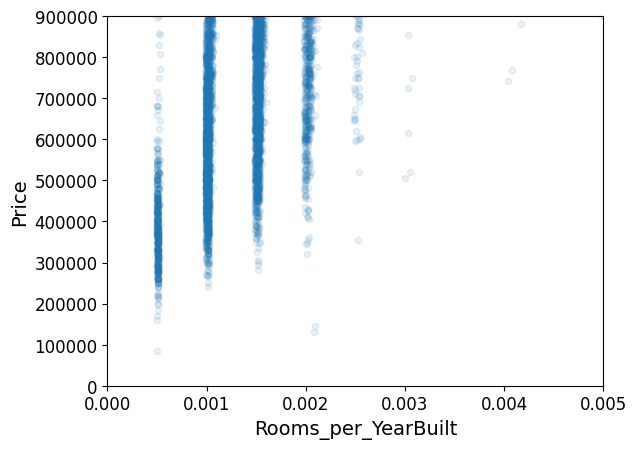

In [ ]:
df_melb_data.plot(kind='scatter', x='Rooms_per_YearBuilt',y='Price', alpha = 0.1)
plt.axis([0,0.005,0,900000])
plt.show()

In [ ]:
# Medidas de tendencia e dispersao
df_melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Rooms_per_YearBuilt
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,13580.000000,8205.000000,13580.000000,13580.000000,13580.000000,8205.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,139.633972,1964.684217,-37.809203,144.995216,7454.417378,0.001495
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,392.217403,37.273762,0.079260,0.103916,4378.581772,0.000501
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,0.000496
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,122.000000,1940.000000,-37.856822,144.929600,4380.000000,0.001020
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000,0.001523
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,129.940000,1999.000000,-37.756400,145.058305,10331.000000,0.001988
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,0.004985
